## 1. 讀入套件

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

## 2. 讀入手寫辨識圖片資料並做處理

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 3. 匯入之前fashion資料集所做的CNN模型

In [6]:
fashion_model = tf.keras.models.load_model('fashion_model.h5')

In [7]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

## 4. 進行Transfer Learning

In [8]:
# 只訓練最後三層
for layer in fashion_model.layers[:-3]:
    layer.trainable = False

In [9]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

In [10]:
fashion_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = fashion_model.fit(x_train, y_train, batch_size=100, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
600/600 [==============================] - 5s 8ms/step - loss: 0.6732 - accuracy: 0.8160 - val_loss: 0.1883 - val_accuracy: 0.9413
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.2196 - accuracy: 0.9312 - val_loss: 0.1307 - val_accuracy: 0.9578
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1649 - accuracy: 0.9481 - val_loss: 0.1151 - val_accuracy: 0.9630
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1375 - accuracy: 0.9565 - val_loss: 0.1047 - val_accuracy: 0.9658
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1223 - accuracy: 0.9608 - val_loss: 0.0937 - val_accuracy: 0.9694
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1073 - accuracy: 0.9652 - val_loss: 0.0963 - val_accuracy: 0.9690
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0968 - accuracy: 0.9684 - val_loss: 0.0865 - val_accuracy: 0.9721
Epoch 

## 5.結果

(0.9, 1.0)

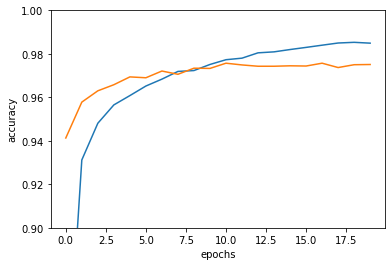

In [12]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0.9, 1)

(0.0, 0.3)

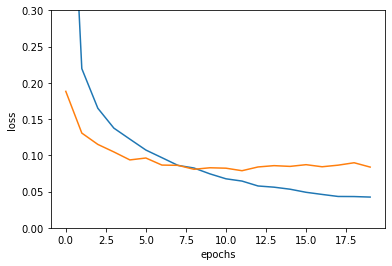

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.3)